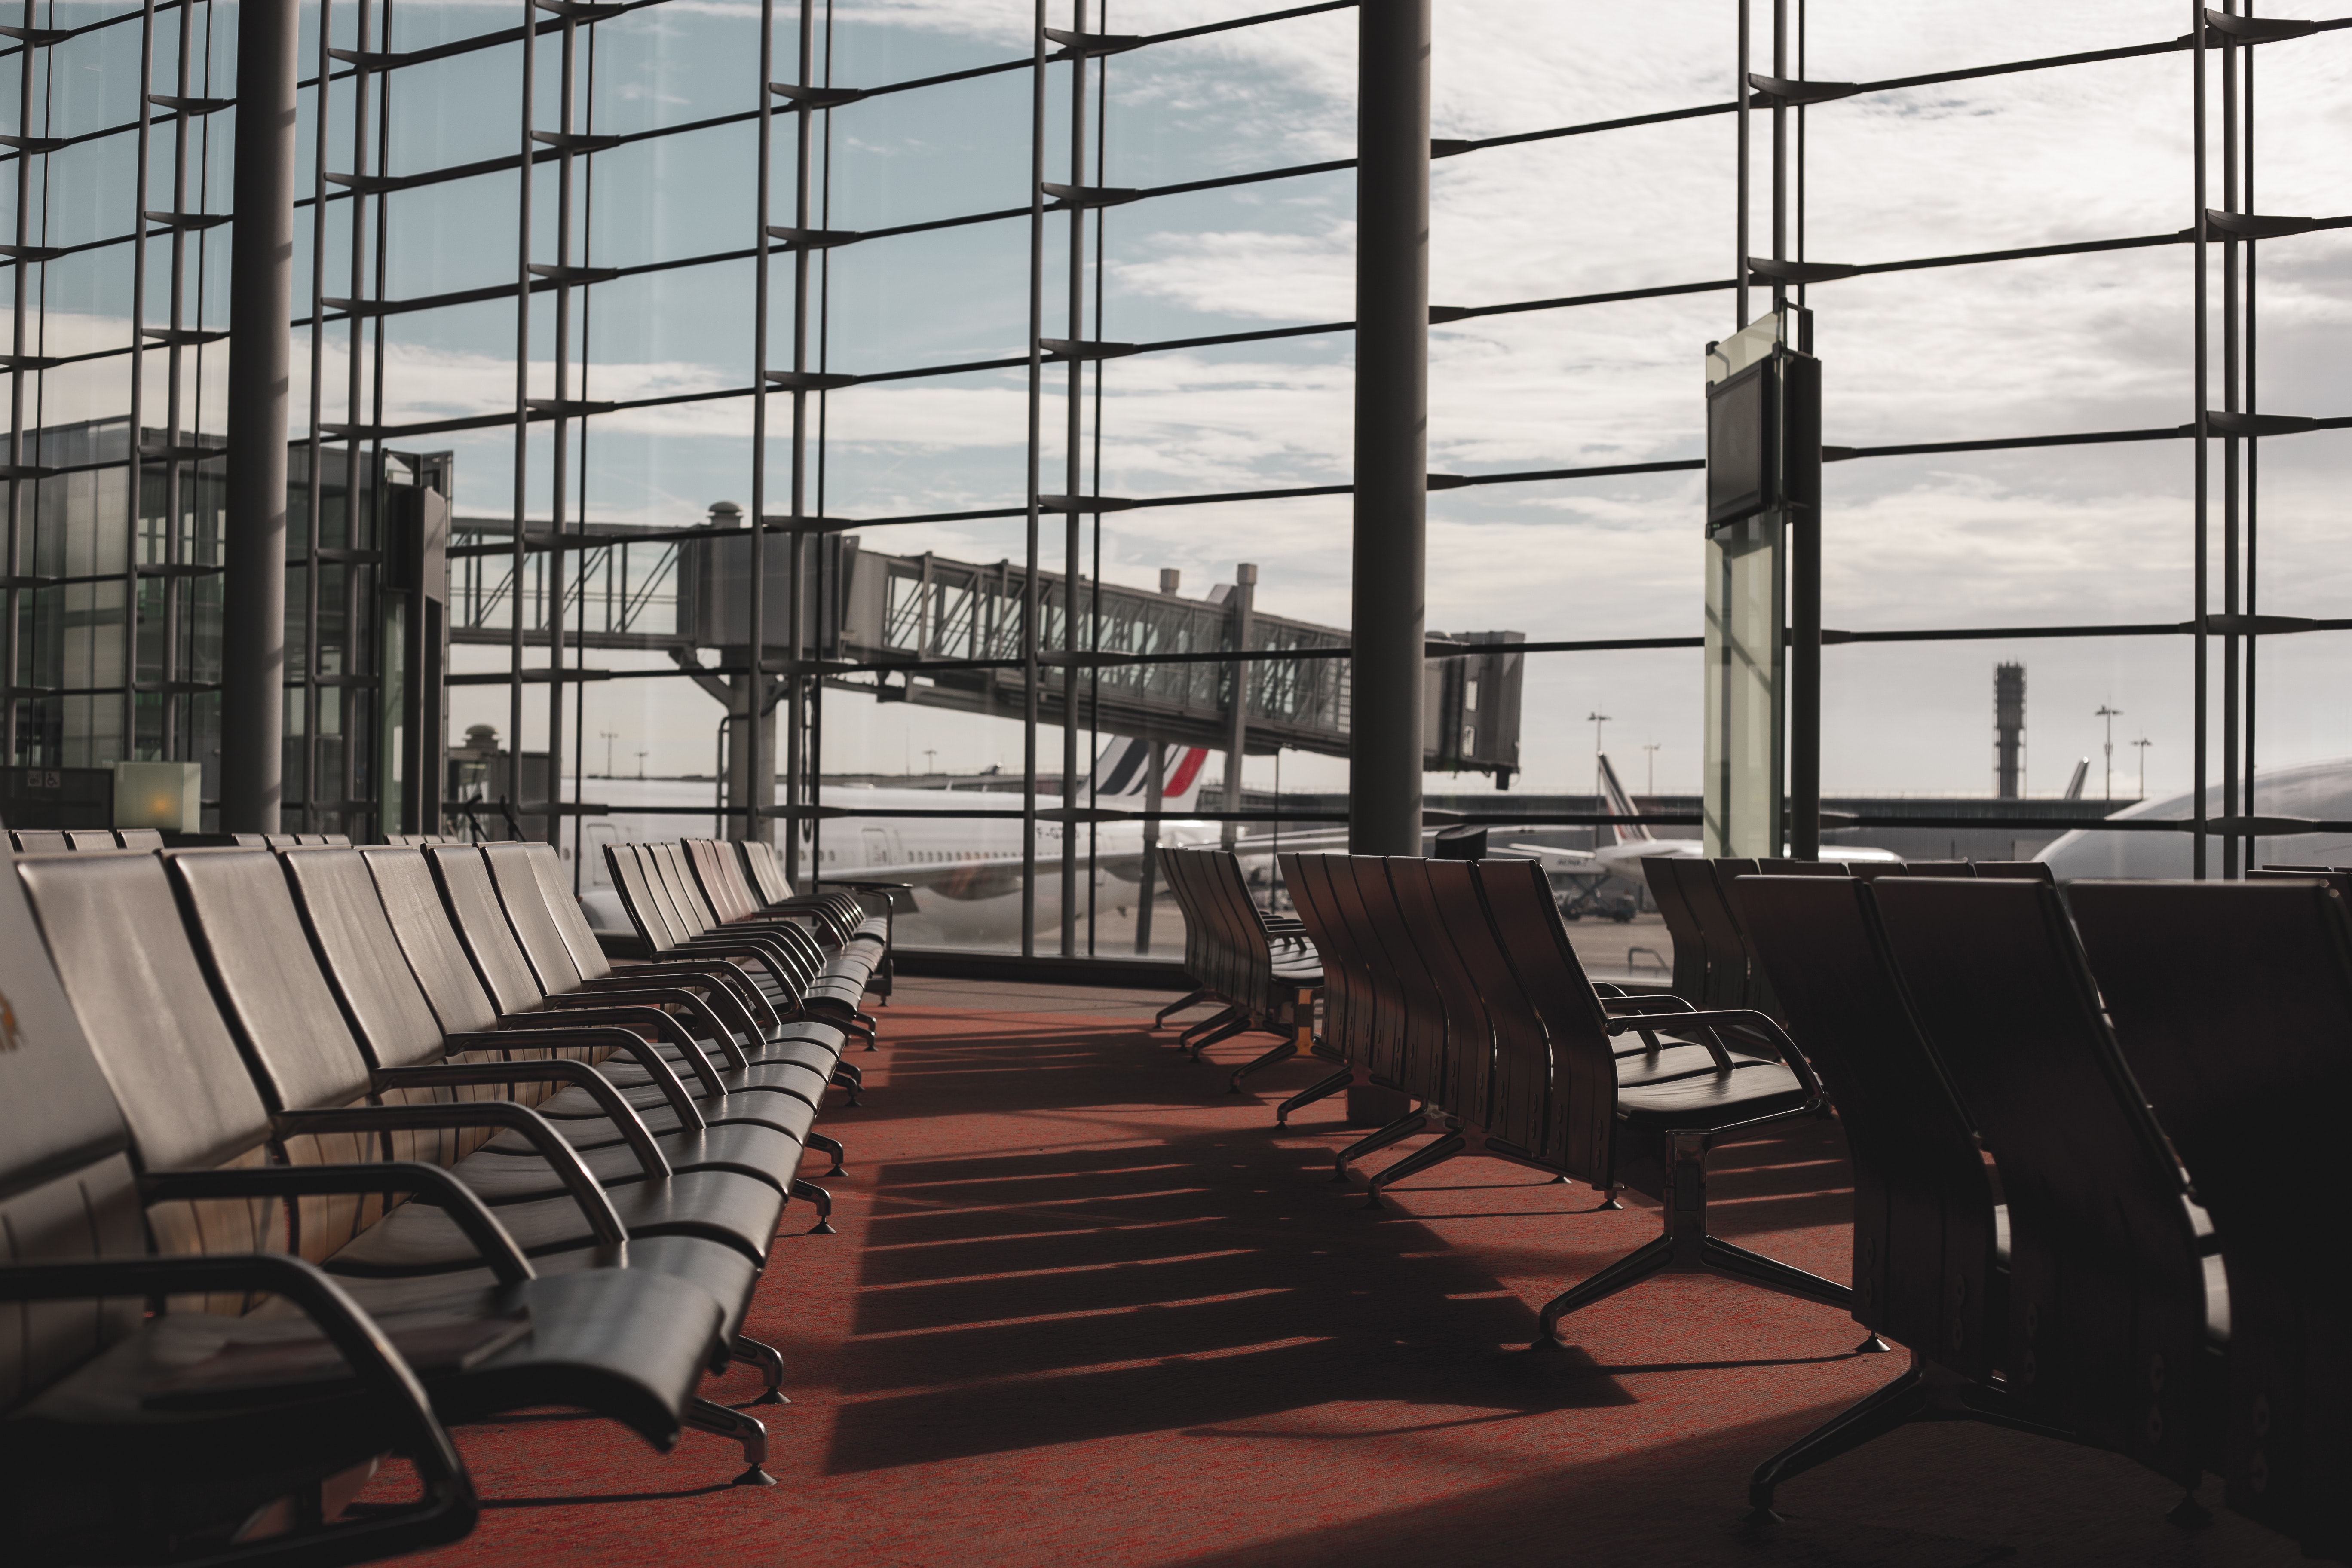

# Capstone Project: Airline Delays

Data analysis and machine learning with Python!

Wraps up Udemy course from Jose Portilla: Python for Data Science and Machine Learning Bootcamp

**March 13-15, 2023**

Garrett Becker

____
____
## Part 4: K-Nearest Neighbors and K-Means Clustering
____
____

____
## Imports and Setup
____

** Import modules **

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

** Import data **

In [24]:
df = pd.read_csv('airlines_delay.csv')

In [25]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


** Fix NaN values **

In [26]:
df[df.isna().any(axis=1)]

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class


** Make dummy variables for airlines and airports  **

In [27]:
airline_labels = ['Airline']
df = pd.get_dummies(df, columns=airline_labels, drop_first=False)

In [28]:
airportfrom_labels = ['AirportFrom']
df = pd.get_dummies(df, columns=airportfrom_labels, drop_first=False)

In [29]:
airportto_labels = ['AirportTo']
df = pd.get_dummies(df, columns=airportto_labels, drop_first=False)

In [30]:
df

,Flight,Time,Length,DayOfWeek,Class,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
0,2313.0,1296.0,141.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6948.0,360.0,146.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1247.0,1170.0,143.0,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,31.0,1410.0,344.0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,563.0,692.0,98.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539377,6973.0,530.0,72.0,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539378,1264.0,560.0,115.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539379,5209.0,827.0,74.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539380,607.0,715.0,65.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Columns: 609 entries, Flight to AirportTo_YUM
dtypes: float64(3), int64(2), uint8(604)
memory usage: 331.3 MB


____
## K-Nearest Neighbors
____

In [41]:
df.columns

Index(['Flight', 'Time', 'Length', 'DayOfWeek', 'Class', 'Airline_9E',
       'Airline_AA', 'Airline_AS', 'Airline_B6', 'Airline_CO',
       ...
       'AirportTo_TXK', 'AirportTo_TYR', 'AirportTo_TYS', 'AirportTo_UTM',
       'AirportTo_VLD', 'AirportTo_VPS', 'AirportTo_WRG', 'AirportTo_XNA',
       'AirportTo_YAK', 'AirportTo_YUM'],
      dtype='object', length=609)

In [42]:
x = df.drop(['Flight', 'Class'], axis=1).head(50000)
y = df['Class'].head(50000)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

** Training the data **

In [44]:
knn = KNeighborsClassifier(n_neighbors=1)

In [45]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

** Predicting the testing data **

In [46]:
predictions = knn.predict(x_test)

In [47]:
print(confusion_matrix(y_test, predictions))

[[5788 3215]
 [3159 2838]]


In [48]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.65      0.64      0.64      9003
           1       0.47      0.47      0.47      5997

    accuracy                           0.58     15000
   macro avg       0.56      0.56      0.56     15000
weighted avg       0.58      0.58      0.58     15000



** Choosing a K value **

In [49]:
error_rate = []

for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error_rate.append(np.mean(pred != y_test))

Text(0, 0.5, 'Error Rate')

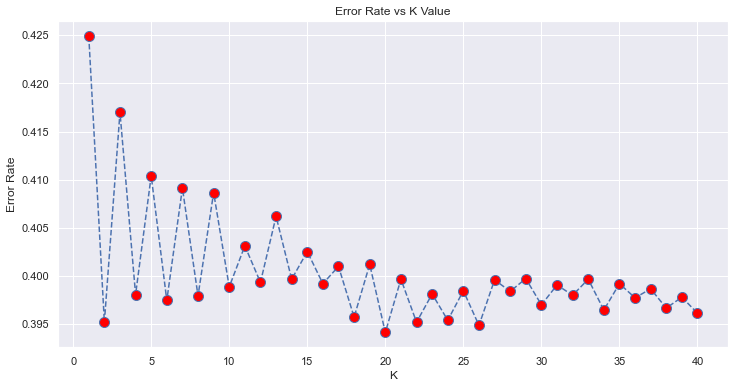

In [50]:
plt.figure(figsize=(12,6))
plt.plot(range(1,41), error_rate, linestyle='--', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

** Retrain with new K value **

In [51]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print('With K=31\n')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

With K=31

[[7164 1839]
 [4147 1850]]
              precision    recall  f1-score   support

           0       0.63      0.80      0.71      9003
           1       0.50      0.31      0.38      5997

    accuracy                           0.60     15000
   macro avg       0.57      0.55      0.54     15000
weighted avg       0.58      0.60      0.58     15000



____
## K-Means Clustering
____

** Cluster creation **

In [52]:
kmeans = KMeans(n_clusters = 2)

In [53]:
kmeans.fit(df.drop('Class', axis=1).head(50000))

KMeans(n_clusters=2)

In [54]:
kmeans.cluster_centers_

array([[ 1.32263501e+03,  8.00157137e+02,  1.44217379e+02, ...,
         7.18152690e-04,  1.93348801e-04,  4.69561374e-04],
       [ 5.35909691e+03,  7.98514859e+02,  9.80410989e+01, ...,
         5.43635836e-03, -4.06575815e-19,  5.07393447e-04]])

** Cluster evaluation **

In [57]:
df['Cluster'] = df['Class'].apply(lambda x: 1 if x == 1 else 0)

In [58]:
df.head()

,Flight,Time,Length,DayOfWeek,Class,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,...,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM,Cluster
0,2313.0,1296.0,141.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6948.0,360.0,146.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1247.0,1170.0,143.0,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,31.0,1410.0,344.0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,563.0,692.0,98.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
print(confusion_matrix(df['Cluster'].head(50000), kmeans.labels_))
print('\n')
print(classification_report(df['Cluster'].head(50000), kmeans.labels_))

[[21121  8790]
 [15083  5006]]


              precision    recall  f1-score   support

           0       0.58      0.71      0.64     29911
           1       0.36      0.25      0.30     20089

    accuracy                           0.52     50000
   macro avg       0.47      0.48      0.47     50000
weighted avg       0.49      0.52      0.50     50000

